<a href="https://colab.research.google.com/github/Albieri-Ray/Albieri_DML/blob/main/Supervised_models/Linear_regression/Lab_Boston_Housing_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://storage.googleapis.com/kaggle-datasets-images/1379/2485/a52db2794593657403a4235bfc4147aa/dataset-cover.jpg
" width="1000" height="300" > 


<h1 align=center><font size = 5>Boston Housing</font></h1>

---

## Introducción


En este laboratorio, aprenderá a usar python para construir un modelo de regresión.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de regresión.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Testear modelo </h5>     

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Importar Librerías</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Pre-selección de variables</a> 
4. <a href="#item33">Preparación de datos</a> 
5. <a href="#item33">Construir un modelo de regresión lineal</a>  
6. <a href="#item34">Entrenar y Testear el modelo</a>  

</font>
</div>

## Descargar y limpiar Dataset


Primero, importemos algunos módulos comunes, asegurémonos de que MatplotLib tenga una configuración adecuada para el tamaño de nuestros gráficos. También verificamos que Python 3.5 o posterior esté instalado (aunque Python 2.x puede funcionar, está obsoleto), así como Scikit-Learn ≥0.20.

In [1]:
# Scikit-Learn 
import sklearn

# Imports comunes
import pandas as pd
import numpy as np
import os

# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

<b>Valores de la vivienda en los suburbios de Boston</b>

<h5>La variable <b>medv</b> es la variable objetivo.</h5>

<b>Descripción de datos</b>

El data frame de Boston tiene 506 filas y 14 columnas.

<b>Este data frame contiene las siguientes columnas:</b>

---

* <b>crim : </b> Tasa de criminalidad per cápita por ciudad.

* <b>zn : </b> Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.

* <b>indus : </b> Proporción de acres comerciales no minoristas por ciudad.

* <b>chas : </b> Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario).

* <b>nox : </b>Concentración de óxidos de nitrógeno (partes por 10 millones).

* <b>rm : </b>Número medio de habitaciones por vivienda.

* <b>años : </b> Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.

* <b>dis : </b>Media ponderada de las distancias a cinco centros de empleo de Boston.

* <b>rad : </b>Indice de accesibilidad a carreteras radiales.

* <b>impuesto : </b>Tasa de impuesto a la propiedad de valor total por \$ 10,000.

* <b>ptratio : </b>Proporción alumno-profesor por ciudad.

* <b>black : </b> 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad.

* <b>lstat : </b>Estatus más bajo de la población (porcentaje).

* <b>medv : </b>Valor medio de las viviendas ocupadas por sus propietarios en \$ 1000.

---

<strong>Puede consultar este [link](https://kaggle.com/c/boston-housing) para leer más sobre la fuente de datos boston housing.</strong>

<strong>Puede descargar la data en este [link](https://www.kaggle.com/datasets/altavish/boston-housing-dataset)</strong>


## 1. Leyendo y Explorando data

In [2]:
#cargamos la data

pddf = pd.read_csv('HousingData 2.csv')

In [3]:
pddf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
pddf.shape

(506, 14)

In [5]:
# Vamos a describir la información
pddf.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


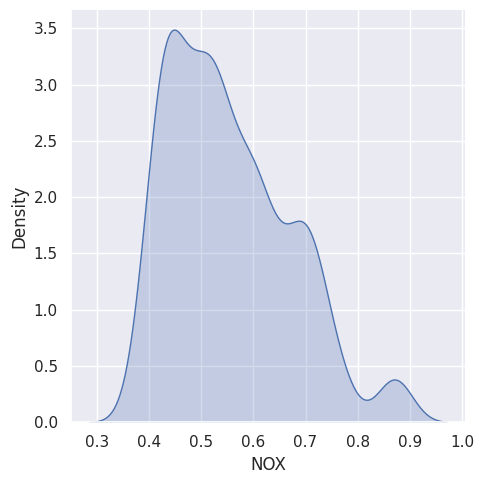

In [6]:
# Gráfico de distribución 
import seaborn as sns
sns.displot(pddf.NOX, kind="kde", fill=True)

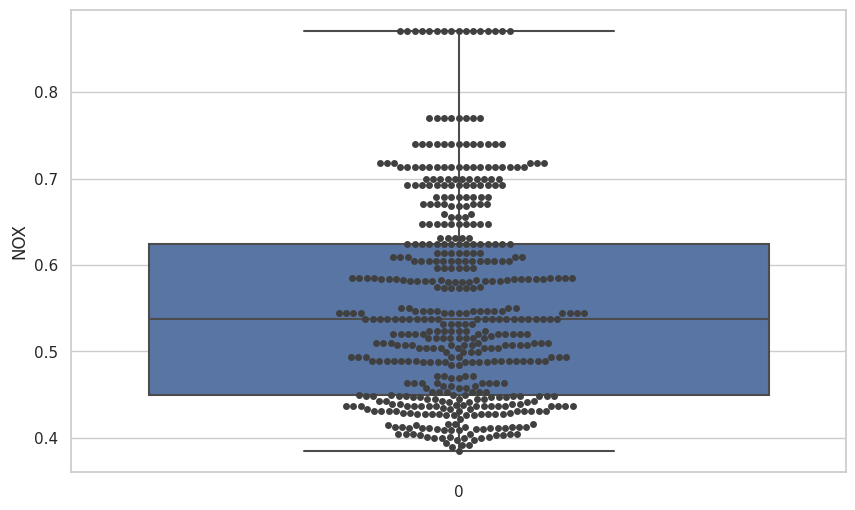

In [7]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=pddf.NOX, orient="v")
ax = sns.swarmplot(data=pddf.NOX, color=".25")


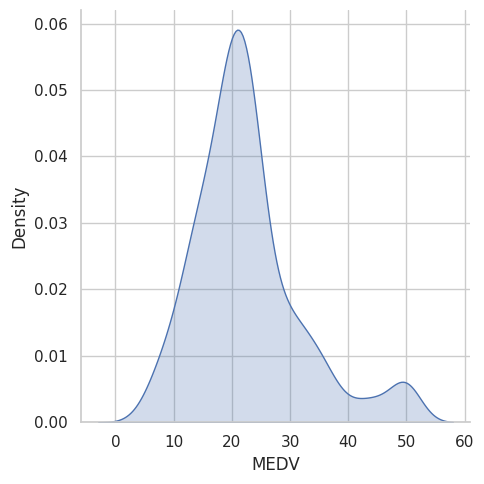

In [8]:
sns.displot(pddf.MEDV, kind="kde", fill=True)

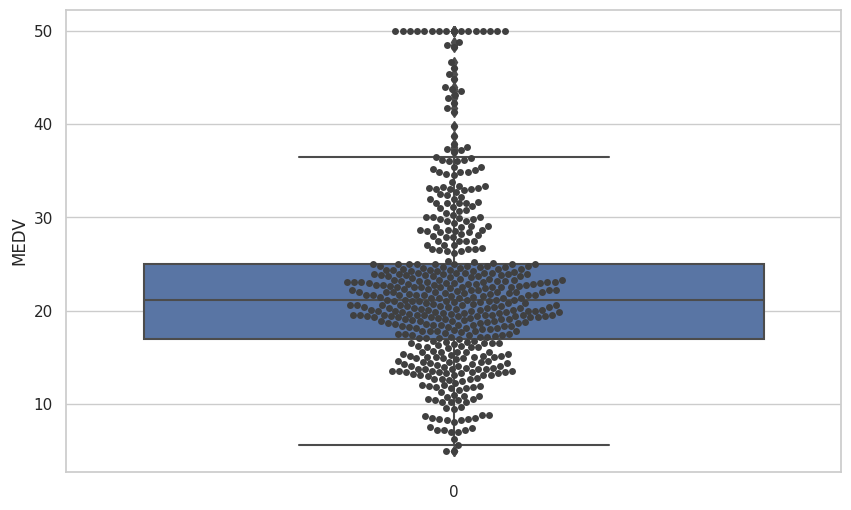

In [9]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=pddf.MEDV, orient="v")
ax = sns.swarmplot(data=pddf.MEDV, color=".25")

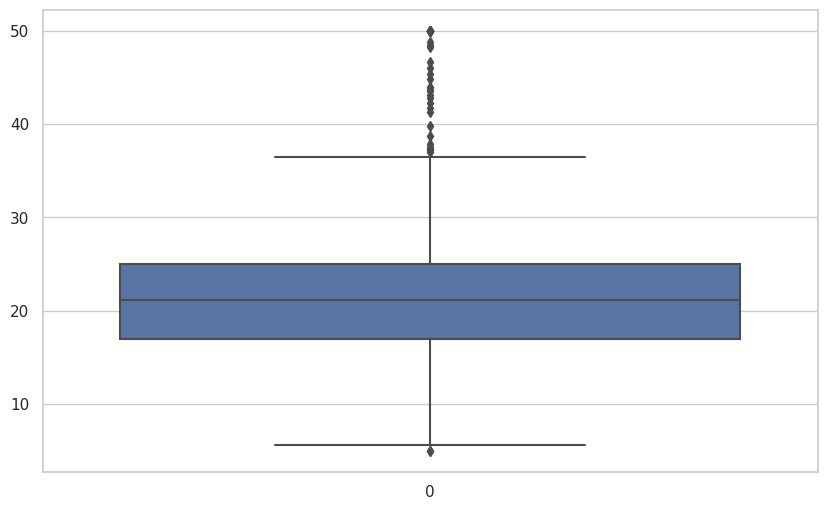

In [18]:
ax = sns.boxplot(data=pddf.MEDV, orient="v")

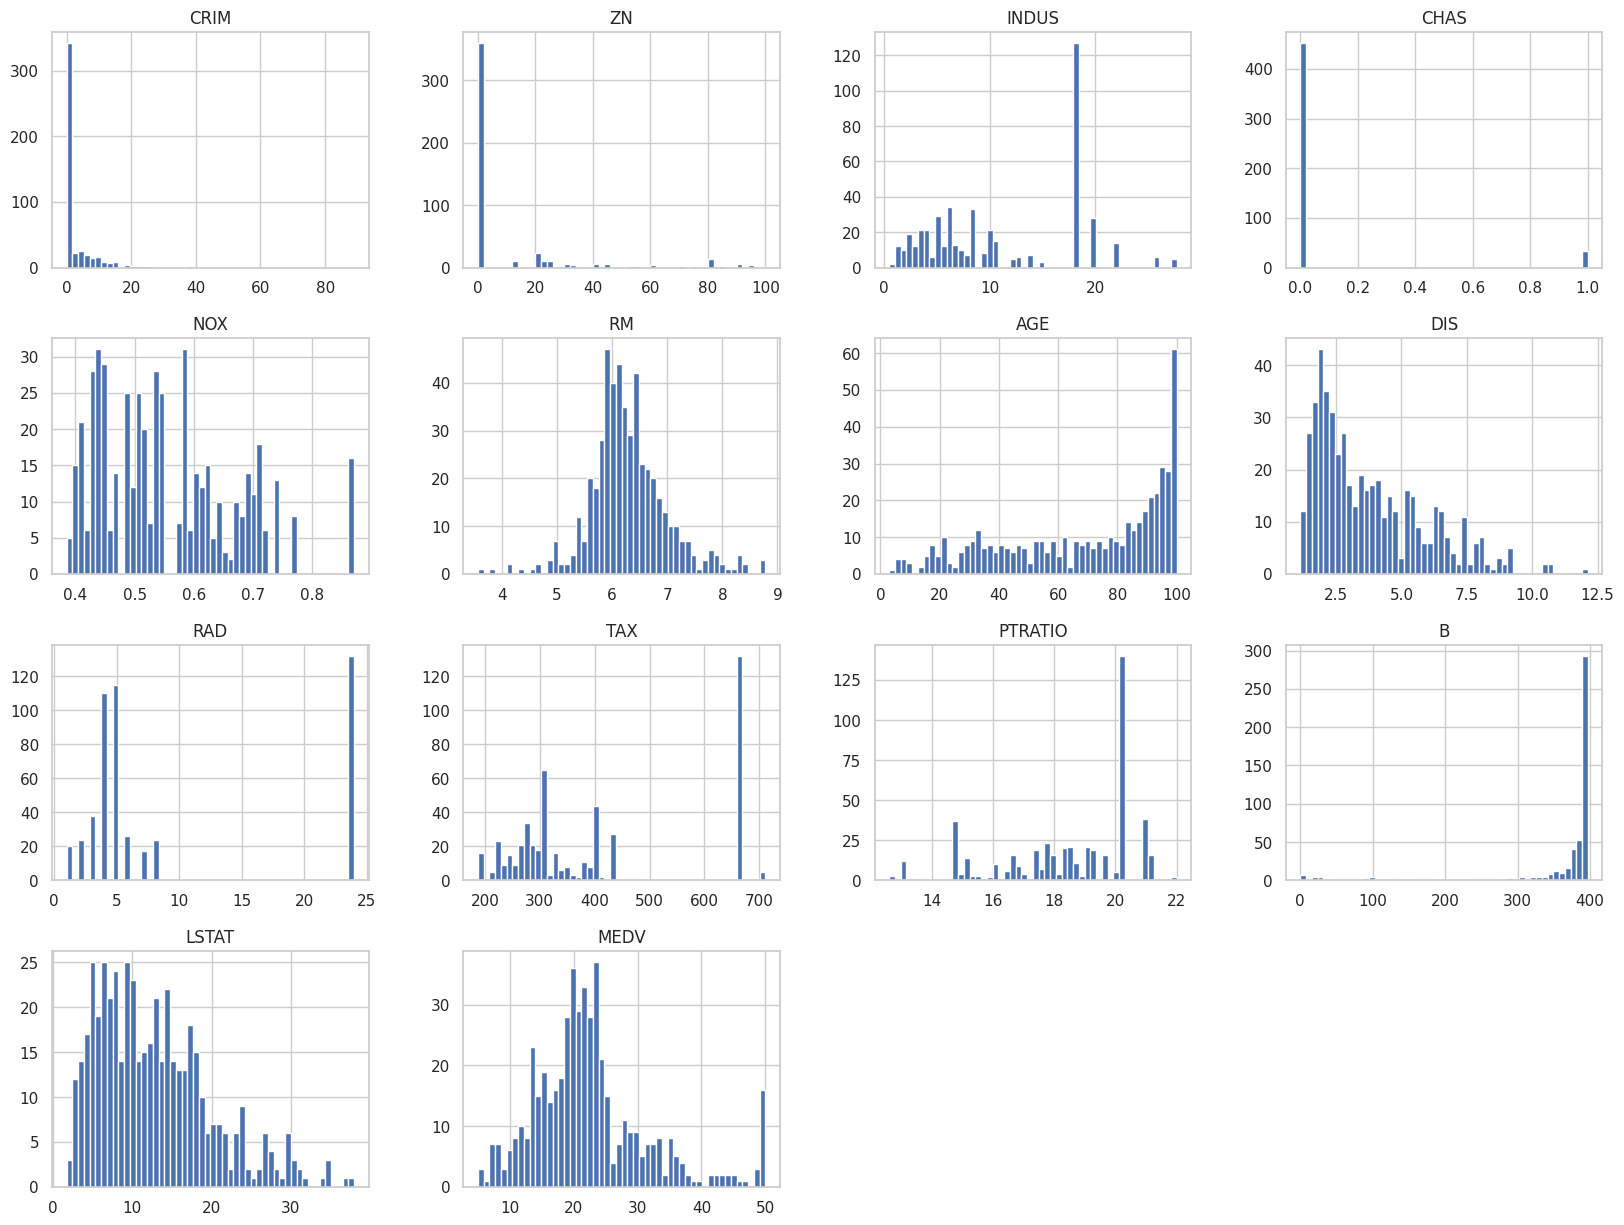

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
pddf.hist(bins=50, figsize=(20,15))
plt.show()

## 2. Selección de muestras

In [11]:
pddf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [13]:
# Shuffle the data
from sklearn.utils import shuffle
pddf = shuffle(pddf, random_state = 123)


In [14]:
# Elección de variables
features = list(set(pddf.columns.tolist()) - set(['MEDV']))
features


['AGE',
 'CRIM',
 'RAD',
 'ZN',
 'PTRATIO',
 'DIS',
 'TAX',
 'INDUS',
 'LSTAT',
 'CHAS',
 'RM',
 'B',
 'NOX']

In [15]:
# Definiendo data
X = pddf[features]
y = pddf.MEDV


In [16]:
# Muestreo

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.7, 
                                                    random_state = 123)


In [17]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)


(506, 13)
(354, 13)
(152, 13)


Text(0, 0.5, '$y$')

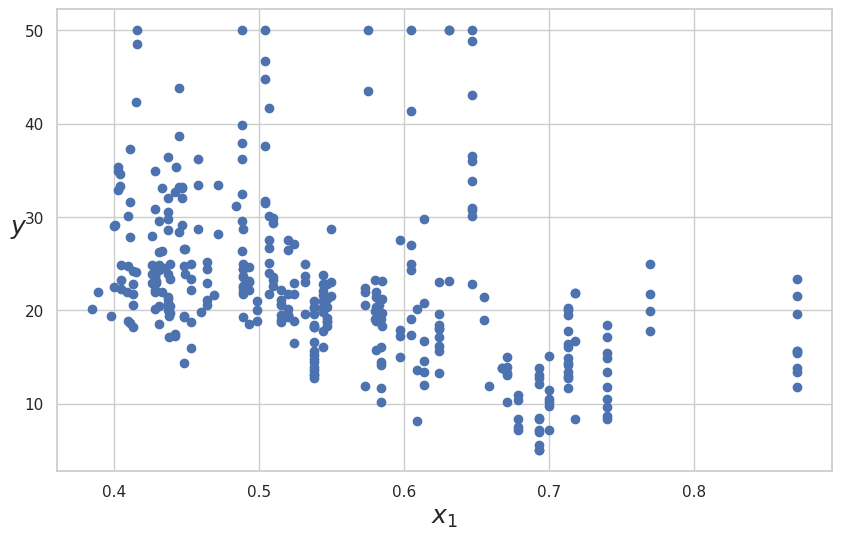

In [19]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

plt.scatter(X_train.NOX, y_train)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

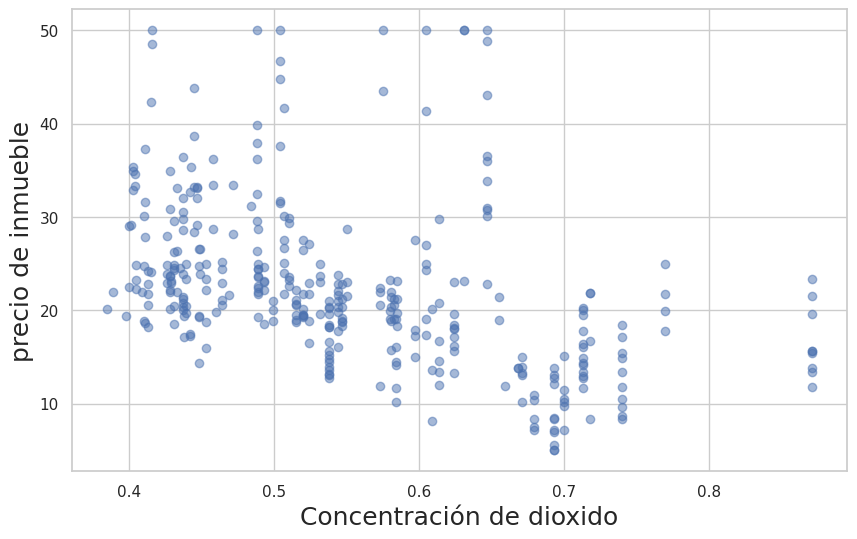

In [25]:
plt.scatter(X_train.NOX, y_train, alpha = 0.5)
plt.xlabel("Concentración de dioxido", fontsize=18)
plt.ylabel("precio de inmueble", rotation=90, fontsize=18)
plt.show()

In [47]:

# Muestreo
from sklearn.model_selection import train_test_split

train, test = train_test_split(pddf, 
                               train_size = 0.7, 
                               random_state = 123)

train[['NOX', 'MEDV']].corr()

,NOX,MEDV
NOX,1.000000,-0.434661
MEDV,-0.434661,1.000000


array([[<Axes: xlabel='AGE', ylabel='AGE'>,
        <Axes: xlabel='CRIM', ylabel='AGE'>,
        <Axes: xlabel='RAD', ylabel='AGE'>,
        <Axes: xlabel='ZN', ylabel='AGE'>,
        <Axes: xlabel='PTRATIO', ylabel='AGE'>,
        <Axes: xlabel='DIS', ylabel='AGE'>,
        <Axes: xlabel='TAX', ylabel='AGE'>,
        <Axes: xlabel='INDUS', ylabel='AGE'>,
        <Axes: xlabel='LSTAT', ylabel='AGE'>,
        <Axes: xlabel='CHAS', ylabel='AGE'>,
        <Axes: xlabel='RM', ylabel='AGE'>,
        <Axes: xlabel='B', ylabel='AGE'>,
        <Axes: xlabel='NOX', ylabel='AGE'>],
       [<Axes: xlabel='AGE', ylabel='CRIM'>,
        <Axes: xlabel='CRIM', ylabel='CRIM'>,
        <Axes: xlabel='RAD', ylabel='CRIM'>,
        <Axes: xlabel='ZN', ylabel='CRIM'>,
        <Axes: xlabel='PTRATIO', ylabel='CRIM'>,
        <Axes: xlabel='DIS', ylabel='CRIM'>,
        <Axes: xlabel='TAX', ylabel='CRIM'>,
        <Axes: xlabel='INDUS', ylabel='CRIM'>,
        <Axes: xlabel='LSTAT', ylabel='CRIM'>,
        

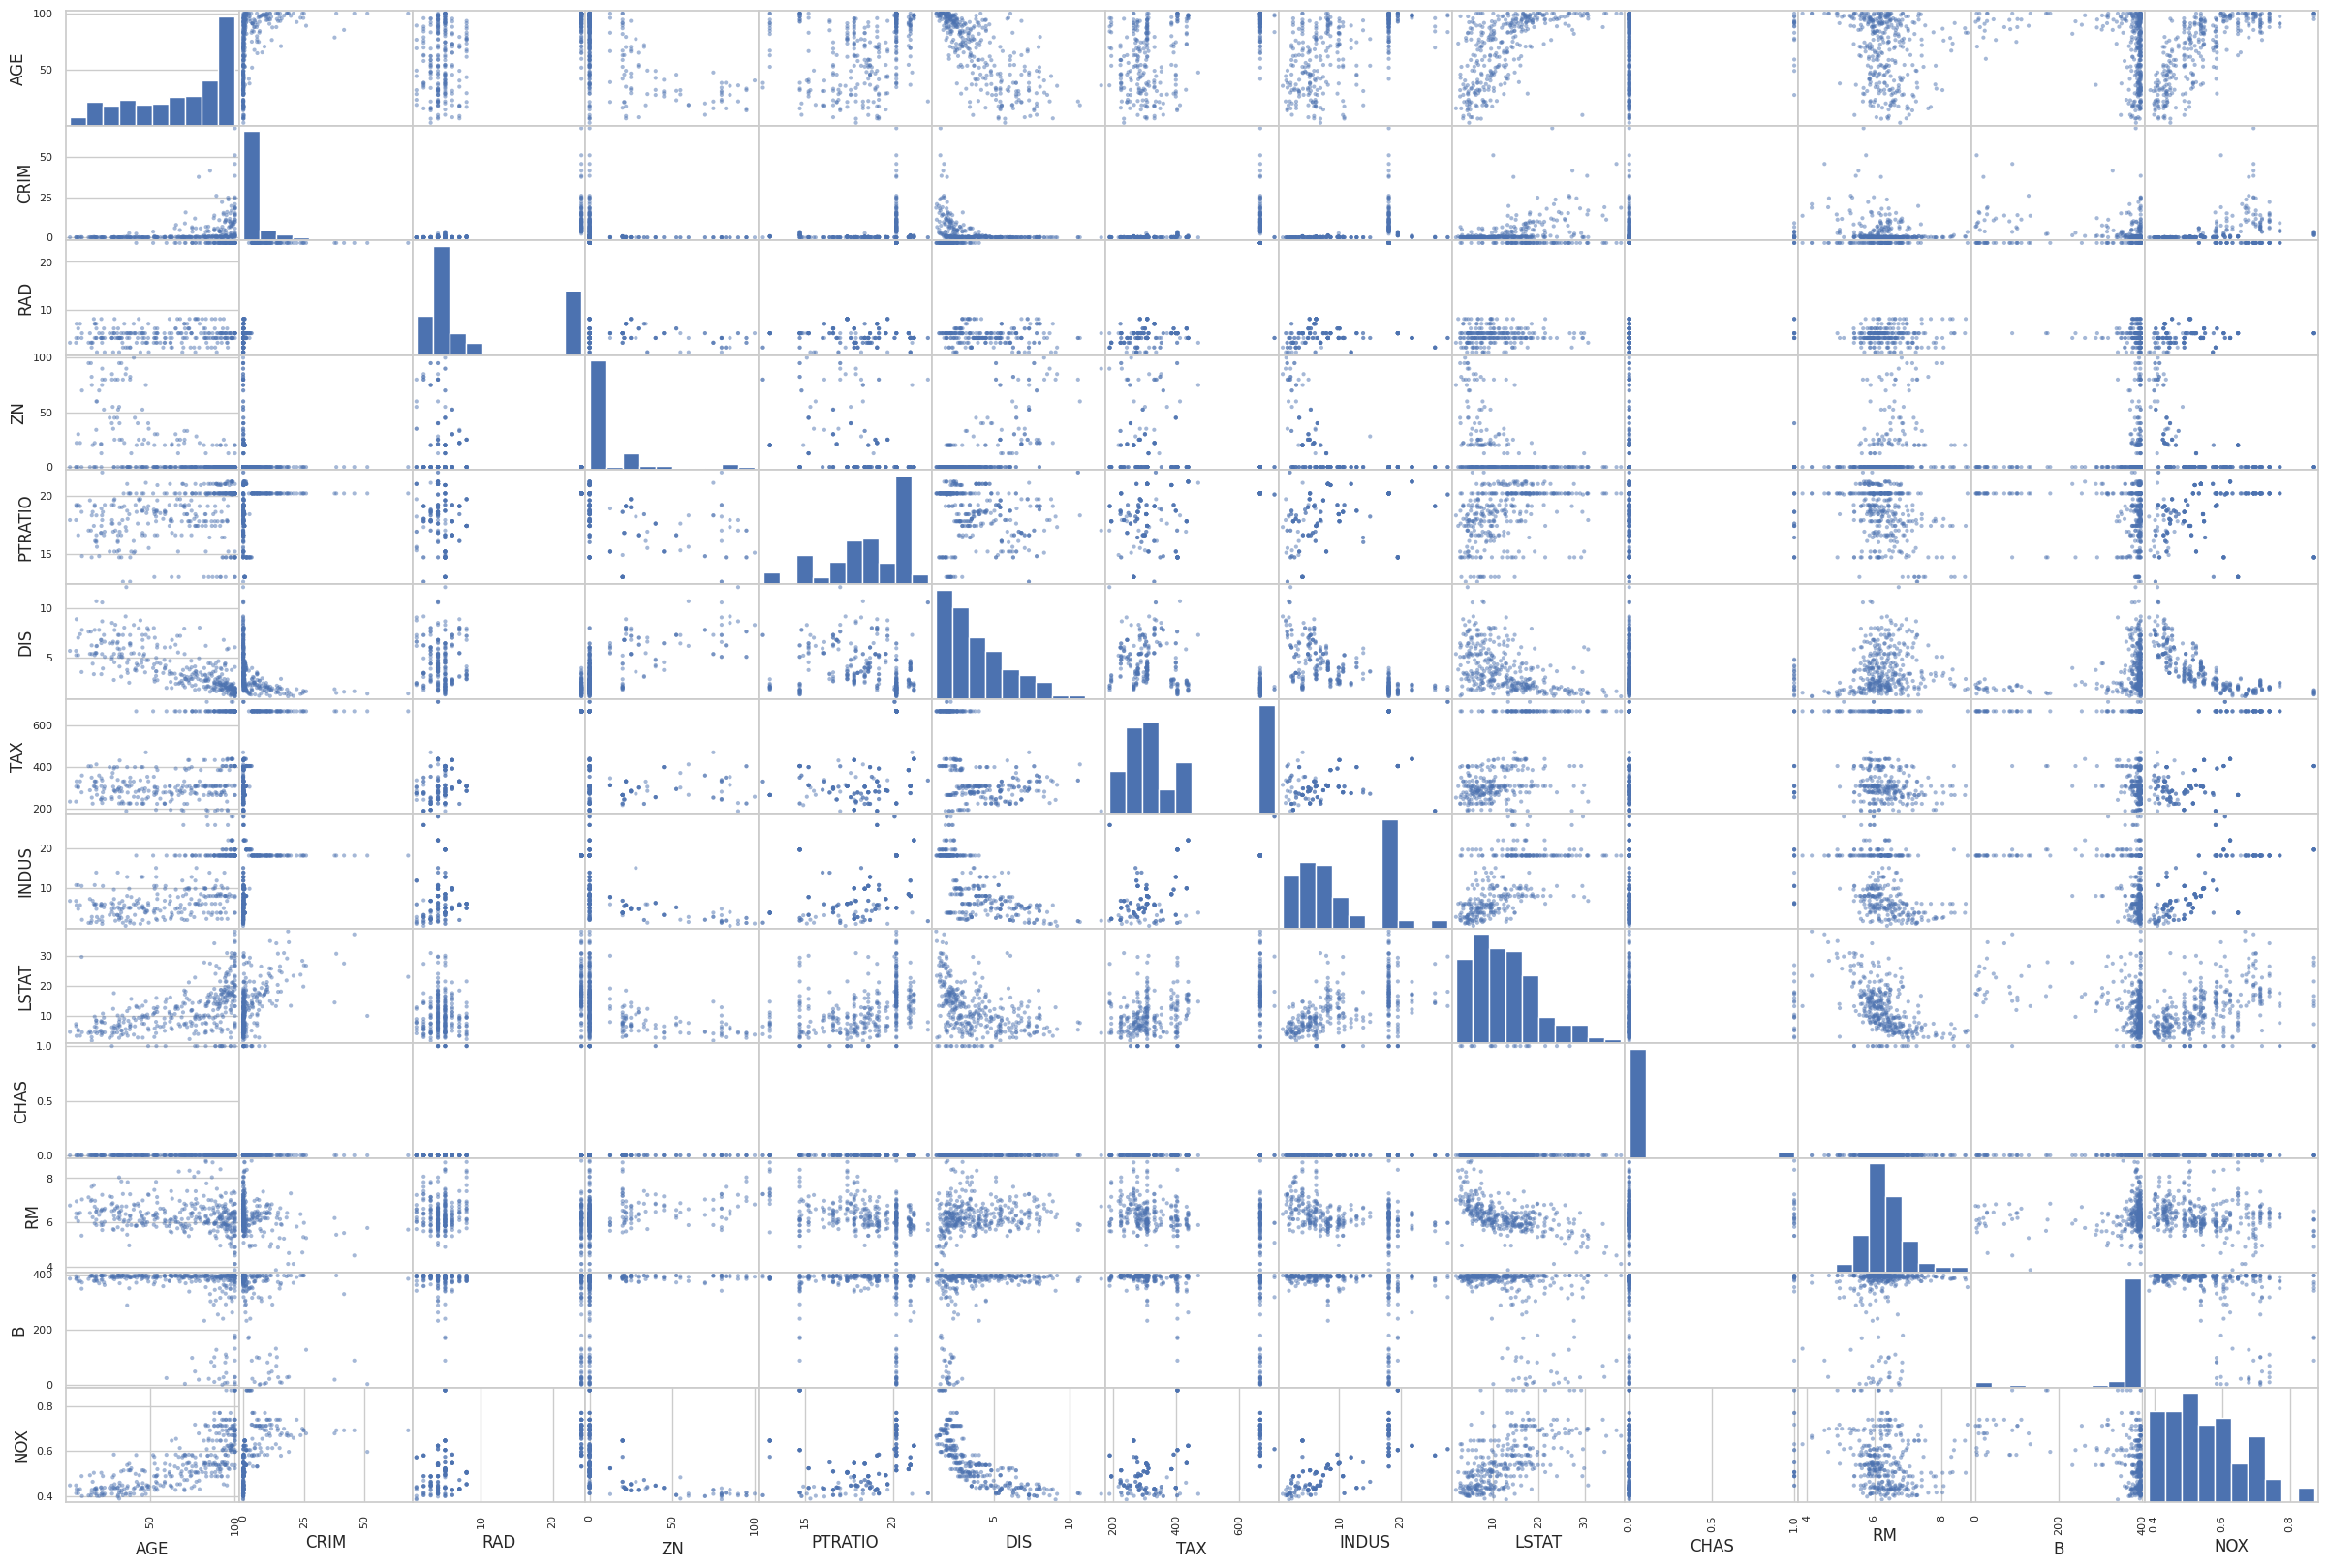

In [29]:
# Matriz de scatterplots
from pandas.plotting import scatter_matrix
scatter_matrix(X_train, figsize=(30, 20))


## 3. Pre-selección de variables

In [ ]:
# Dando formato a nuestra tabla resumen

pdResume = X_train.describe().transpose()
pdResume.reset_index(inplace = True)
pdResume.rename(columns = {'index' : 'feature',
                           '25%' : 'Q1',
                           '50%' : 'median',
                           '75%' : 'Q3'}, inplace = True)


In [ ]:
pdResume[['missing_rate']] = 1 - pdResume[['count']]/X_train.shape[0]
pdResume.sort_values(by = 'missing_rate', ascending = False, inplace = True)


In [ ]:
# Calculando las correlaciones de todas las variables con el target

temp = X_train.copy()
temp['target'] = y_train

correlations = []
for col in features:
  correlations.append(temp[[col, 'target']].corr().iloc[0][1])


In [ ]:
# Cruzando correlaciones con la tabla de resumen original

pdres_cor = pd.DataFrame({'feature' : features, 'corr_MEDV' : correlations})
pdResume2 = pd.merge(pdResume, pdres_cor, on = 'feature')


In [ ]:
pdResume2['abs_corr_MEDV'] = pdResume2.corr_MEDV.apply(lambda x: abs(x))
pdResume2.sort_values(by = 'abs_corr_MEDV', ascending = False, inplace=True)

pdResume2.head()

In [ ]:
# Guardando resultados
pdResume2.to_csv('univariate_assesment.csv', index = 0)

## 4. Preparación de datos

<h3>Tratamiento de outliers</h3> 

### Outliers por Rango Intercuantílico

<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" width="500" 
     height="300" > 

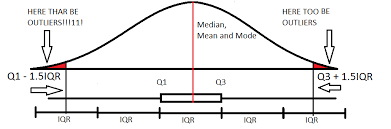 

In [ ]:
#Leyendo tabla resumen

univariate_II = pd.read_csv('univariate_assesment.csv')
univariate_II.head() 

In [ ]:
# Calculando los intervalos RIC

univariate_II['ric'] = univariate_II['Q3'] - univariate_II['Q1']

univariate_II['min_ric'] = univariate_II['Q1'] - 1.5*univariate_II['ric']
univariate_II['max_ric'] = univariate_II['Q3'] + 1.5*univariate_II['ric']

univariate_II.head() 

In [ ]:
# Tratamiento de outliers por RIC

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_train[col + '_tric'] = X_train[col].apply(lambda x: desc.max_ric.values[0] if x > desc.max_ric.values[0]
                                                   else desc.min_ric.values[0] if x < desc.min_ric.values[0]
                                                   else x)

X_train.head()

Revisemos los resultados

In [ ]:
sns.displot(X_train, x = "CRIM", kind="kde", fill=True)

In [ ]:
sns.displot(X_train, x = "CRIM_tric", kind="kde", fill=True)

### Outliers por Z-score



<img src="https://editor.analyticsvidhya.com/uploads/440971.png" width="500" 
     height="300" > 

In [ ]:
univariate_II.head()

In [ ]:
# Calculando los intervalos Z-score

univariate_II['min_zscore'] = univariate_II['mean'] - 3*univariate_II['std']
univariate_II['max_zscore'] = univariate_II['mean'] + 3*univariate_II['std']

univariate_II.head() 

In [ ]:
# Tratamiento de outliers por Z-score

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_train[col + '_tzscore'] = X_train[col].apply(lambda x: desc.max_zscore.values[0] if x > desc.max_zscore.values[0]
                                                   else desc.min_zscore.values[0] if x < desc.min_zscore.values[0]
                                                   else x)

X_train.head()

Revisemos los resultados

In [ ]:
sns.displot(X_train, x = "CRIM", kind="kde", fill=True)

In [ ]:
sns.displot(X_train, x = "CRIM_tzscore", kind="kde", fill=True)

In [ ]:
univariate_II.to_csv('univariate_assesment.csv', index = 0)

### Tratamiento de Missings

In [ ]:
all_features = X_train.columns.tolist()

In [ ]:
# Trataiento de missings

X_train[[x + '_imp' for x in all_features]] = X_train[all_features].fillna(X_train[all_features].median())


In [ ]:
X_train[[x + '_imp' for x in all_features]].head(30)

## 5. Modelo de regresión Lineal

### Rregresión lineal por máxima verosimilitud

In [ ]:
features_in = [x + '_imp' for x in all_features if ('_tric' in x) and ('CHAS' not in x)]


In [ ]:
# estandarizando las variables para mantener todas en una misma escala
X_train[[x + '_std' for x in features_in]] = (X_train[features_in] - X_train[features_in].mean())/X_train[features_in].std()


In [ ]:
X_train[[x + '_std' for x in features_in]]

In [ ]:
y_train

In [ ]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.OLS(y_train, 
             sm.add_constant(X_train[[x + '_std' for x in features_in]]))
res = mod.fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(res.summary())

In [ ]:
mod = sm.OLS(y_train, sm.add_constant(X_train[['RM_tric_imp_std',
                               'LSTAT_tric_imp_std',
                               #'PTRATIO_tric_imp',
                               'TAX_tric_imp_std',
                               'RAD_tric_imp_std',
                               'CRIM_tric_imp_std',
                               'NOX_tric_imp_std',
                               #'B_tric_imp',
                               'DIS_tric_imp_std']]))
res = mod.fit()
print(res.summary())

In [ ]:
mod = sm.OLS(y_train, sm.add_constant(X_train[['RM_tric_imp_std',
                               'LSTAT_tric_imp_std',
                               #'PTRATIO_tric_imp',
                               'TAX_tric_imp_std',
                               'RAD_tric_imp_std',
                               'CRIM_tric_imp_std',
                               #'NOX_tric_imp_std',
                               #'B_tric_imp',
                               'DIS_tric_imp_std']]))
res = mod.fit()
print(res.summary())

In [ ]:
mod = sm.OLS(y_train, sm.add_constant(X_train[['RM_tric_imp_std',
                               'LSTAT_tric_imp_std',
                               #'PTRATIO_tric_imp',
                               'TAX_tric_imp_std',
                               #'RAD_tric_imp_std',
                               'CRIM_tric_imp_std',
                               #'NOX_tric_imp_std',
                               #'B_tric_imp',
                               'DIS_tric_imp_std']]))
res = mod.fit()
print(res.summary())

In [ ]:
mod = sm.OLS(y_train, sm.add_constant(X_train[['RM_tric_imp_std',
                               #'LSTAT_tric_imp_std',
                               #'PTRATIO_tric_imp',
                               'TAX_tric_imp_std'
                               #'RAD_tric_imp_std',
                               #'CRIM_tric_imp_std',
                               #'NOX_tric_imp_std',
                               #'B_tric_imp',
                               #'DIS_tric_imp_std'
                               ]]))
res = mod.fit()
print(res.summary())


* <b>crim : </b> Tasa de criminalidad per cápita por ciudad.

* <b>rm : </b>Número medio de habitaciones por vivienda.

* <b>dis : </b>Media ponderada de las distancias a cinco centros de empleo de Boston.

* <b>ptratio : </b>Proporción alumno-profesor por ciudad.

* <b>lstat : </b>Estatus más bajo de la población (porcentaje).

* <b>black : </b> 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad.



In [ ]:
X_train[['RM_tric_imp_std',
                               'LSTAT_tric_imp_std',
                               #'PTRATIO_tric_imp',
                               'TAX_tric_imp_std',
                               #'RAD_tric_imp_std',
                               #'CRIM_tric_imp_std',
                               #'NOX_tric_imp_std',
                               #'B_tric_imp',
                               'DIS_tric_imp_std']].corr()